## 파이썬과 판다스를 활용한 실전 데이터 분석

이번 과제는 캐글의 에이비엔비(https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data?select=AB_NYC_2019.csv)데이터를 더 깊게 분석합니다.

데이터 사이언티스트로서 데이터를 분석할 때 가장 필수적인 스킬은 프로그래밍 언어 파이썬([Python](https://www.python.org/)), 데이터 분석 패키지 판다스([Pandas](https://pandas.pydata.org/)), 그리고 데이터 시각화 패키지 씨본([Seaborn](https://seaborn.pydata.org))과 [matplotlib](https://matplotlib.org)입니다. 데이터 분석가는 언제나 주변 동료들의 요청(ex: 운영팀, 재무팀, 마케팅팀)에 맞게 데이터를 뽑아내 그 통계치를 제공하고 시각화 결과를 전달해줘야 하는데, 파이썬과 판다스, 시각화 스킬이 부족하면 주어진 시간 내에 이를 전달해 줄 수 없습니다.

2008년부터 게스트와 호스트는 에어비앤비를 사용하여 여행 가능성을 확장하고 더 독특하고 개인화된 세상 경험 방법을 제시해 왔습니다. 이 데이터 세트는 2019년 뉴욕 NYC의 상장 활동 및 지표를 설명합니다.
이 데이터 파일에는 호스트, 지리적 가용성, 예측을 하고 결론을 도출하는 데 필요한 메트릭에 대해 자세히 알아보는 데 필요한 모든 정보가 포함되어 있습니다. 결국 **뉴욕 에어비앤비 숙소에 대해 가격을 예측하는 회귀분석 프로젝트 입니다.**

* **이번 분석의 목표는 에어비앤비를 새롭게 시작하고픈 신규 사업자 분들을 대상으로 컨설팅 자료를 만들어 보고자 합니다.**
* **우선 저희측에 컨설팅을 제안한 고객의 희망사항을 바탕으로 분석을 진행해보면 될 것입니다.**

#### 고객의 희망사항
* **저렴한 숙박료로 운영의 희망**
* **자본이 넉넉하지 않기 때문에 에어비앤비 방을 1인실 혹은 2인실로 인테리어를 구성희망**

문제를 풀 때 구글에 검색하는 것 모두 허용합니다. (문제 중에는 구글에 검색하지 않으면 풀 수 없는 문제도 몇 개 준비해놓았습니다) 관련 자료는 [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html) 를 강력 추천합니다.

## 칼럼 설명

* **id** : 일련번호
* **name** : 에어비엔비 이름
* **host_id** : 호스트 id
* **host_name** : 호스트 성명
* **neighbourhood_group** : 지구 명
* **neighbourhood** : 지역명
* **latitude** : 위도
* **longitude** : 경도
* **room_type** : 방 타입
* **price** : 가격
* **minimum_nights** : 최소 숙박일수
* **number_of_reviews** : 리뷰 개수
* **last_reviews** : 최근 리뷰 일자
* **reviews_per_month** : 월 평균 리뷰 수
* **calculated_host_listings_count** : 호스트에게 대여 가능한 에어비엔비의 총 개수
* **availability_365** : 1년 중 가능한 대여일수, 즉, 0은 대여가 불가능을 의미

## 라이브러리 불러오기

In [1]:
# 데이터 시각화 패키지 matplotlib에게 inline출력,
# 즉 시각화 결과를 파일로 저장하거나 하지 않고 화면에 바로 출력하도록 명령합니다.
# (Seaborn이 matplotlib를 기반으로 동작하기 때문에, Seaborn에도 동일한 명령이 전달됩니다.)
%matplotlib inline

# 파이썬의 데이터 분석 패키지 판다스(Pandas)를 가져오고, 이를 pd라는 이름의 축약어로 사용합니다.
import pandas as pd
import numpy as np

# 파이썬의 데이터 시각화 패키지 시본(Seaborn)을 가져오고, 이를 sns라는 이름의 축약어로 사용합니다.
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## 데이터 불러오기

In [2]:
# 판다스의 'read_csv' 함수를 활용하여 데이터를 불러옵니다. 불러올때 변수명은 'airbnb'로 지정바랍니다.
# head()로 train 데이터의 상위 5개를 출력합니다.

airbnb = pd.read_csv("data/AB_NYC_2019.csv")
Airbnb = airbnb.set_index('id')

In [3]:
Airbnb.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


1. 위 조건을 가진 고객에게 컨설팅을 해주기 위한 방향성 의논 (20min)
2. 조건, 에어비앤비 데이터, 구글링 3가지를 활용하여 방향성에 맞게 분석해보고 적절한 제시를 하세요.
3. 칼럼활용 - 지역, 가격, 가격설정근거, 그 외 도움이 될만한 자료

## 1. 데이터 파악하기

### 1.1. 결측치 확인

In [4]:
# info()를 이용해서 컬럼별 정보 확인
Airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month         

In [5]:
# isnull().sum(): 컬럼별로 null값인 행의 수 계산
# last_review와 revies_per_month에 결측값이 매우 많음
Airbnb.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# last_review와 reviews_per_month가 결측값인 행만 불러와서 shape로 행, 열의 수를 확인
# 위의 결측값 개수인 10052개와 일치
Airbnb[(Airbnb.last_review.isnull()) & (Airbnb.reviews_per_month.isnull())].shape

(10052, 15)

In [7]:
# unique()를 이용해서 number_or_rivews 컬럼의 고유값들의 종류를 확인할 수 있음
# last_review와 reviews_per_month가 결측값인 경우는 number_of_reviews 값이 0이기 때문
# 따라서 손실된 데이터가 아님 (이유가 있는 결측치)
Airbnb[(Airbnb.last_review.isnull()) & (Airbnb.reviews_per_month.isnull())].number_of_reviews.unique()

array([0], dtype=int64)

### 1.2. 데이터 분포 확인

**매물 위치 시각화**
* 외곽지역인 Staten Island의 밀도가 가장 낮음

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

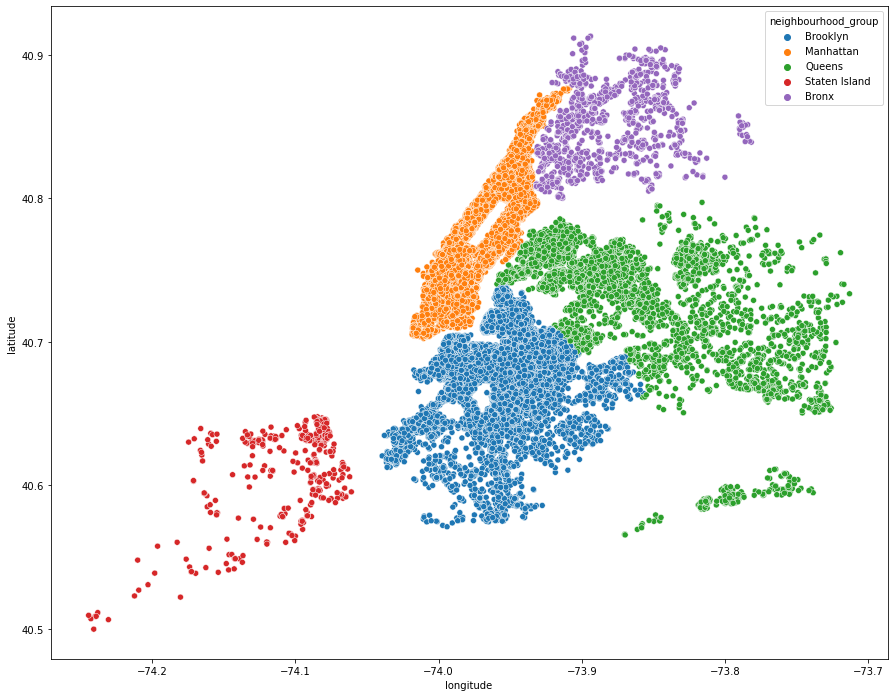

In [8]:
plt.figure(figsize=(15,12))
sns.scatterplot(data=Airbnb, x='longitude', y='latitude', hue='neighbourhood_group')

🖌️ 참고: 뉴욕시 지도
![ㅇㅇ](image/boroughs_of_newyork.jpg)

**자치구별 가격 시각화**

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

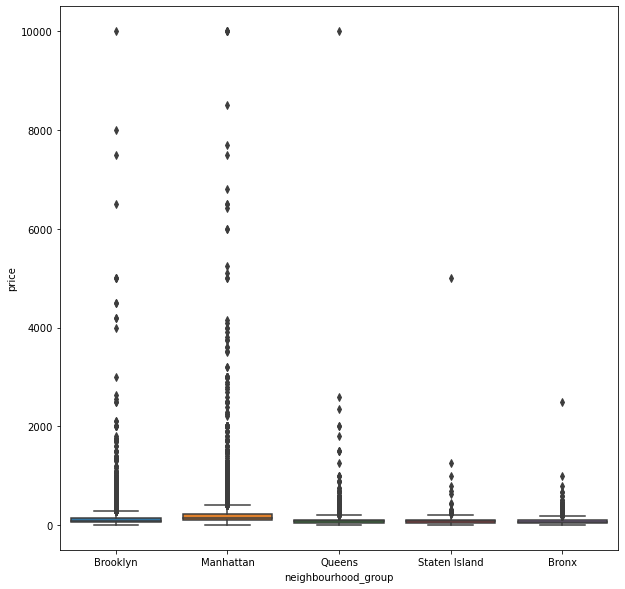

In [9]:
# 이상치가 너무 많아 제대로 확인할 수 없기 때문에 가격 범위를 임의로 지정해 볼 것임
plt.figure(figsize=(10,10))
sns.boxplot(data=Airbnb, x='neighbourhood_group', y='price')

In [10]:
# 가격을 1000 이하로 설정해도 총 데이터 48895개에서 239개밖에 줄지 않음
# shape에서 인덱스 [0]을 지정하면 행의 개수만 불러올 수 있음   +) [1]은 열의 수
Airbnb.shape[0] - Airbnb[Airbnb.price<=1000].shape[0]

239

<AxesSubplot:ylabel='price'>

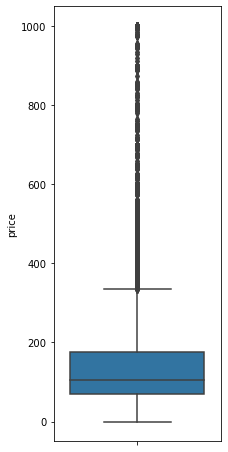

In [11]:
# 가격을 1000 이하로 설정했을 때의 boxplot
plt.figure(figsize=(3,8))
sns.boxplot(data=Airbnb[Airbnb.price<=1000], y='price') # 자치구별로 나누지 않은 boxplot

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

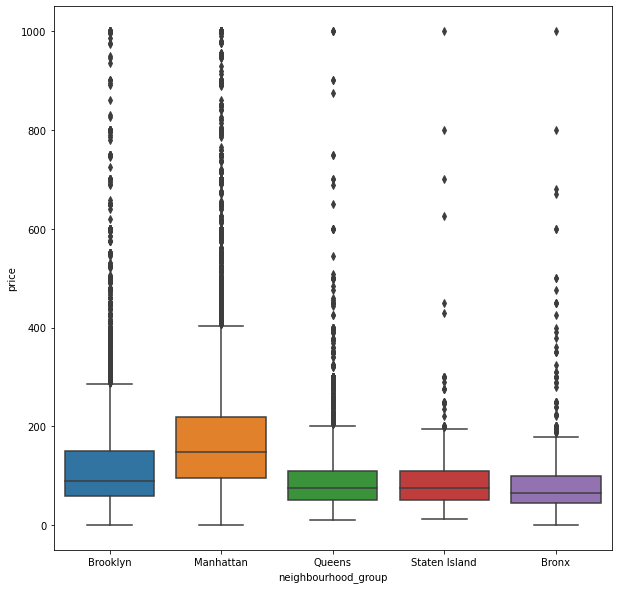

In [12]:
plt.figure(figsize=(10,10))
sns.boxplot(data=Airbnb[Airbnb.price<=1000], x='neighbourhood_group', y='price') # x값을 넣어서 자치구별로 시각화한 boxplot

* 뉴욕시의 에어비앤비 가격은 대부분 200 달러 이하로 형성되어 있음
* Manhattan을 제외했을 때는 150 달러 이하

## 3. 지역 선정하기

### 3.1. 자치구 선정

**자치구별 매물 수 시각화**

In [13]:
# unique()로 고유값 종류 확인
# 1, 2인실로 희망하기 때문에 private room으로 제한
Airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

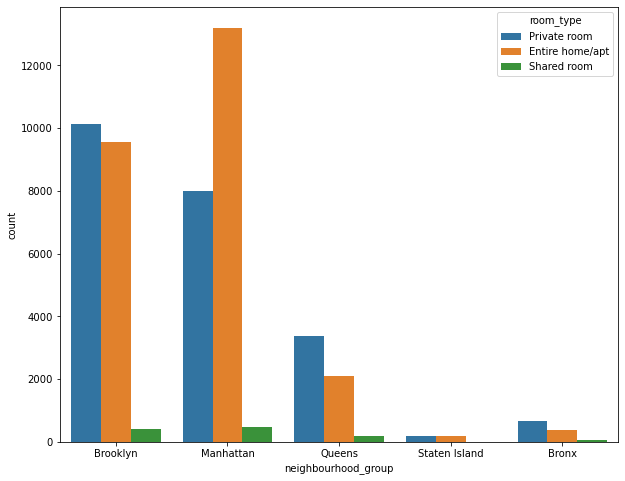

In [14]:
# 자치구별 룸타입별 매물 수
plt.figure(figsize=(10,8))
sns.countplot(data=Airbnb, x='neighbourhood_group', hue='room_type')

In [15]:
# private room인 행만 별도로 저장
private_room = Airbnb[Airbnb.room_type=='Private room']

# paivate_room의 행, 열의 수
private_room.shape

(22326, 15)

In [16]:
# priavate room인 데이터의 자치구별 가격 평균값
private_room.groupby('neighbourhood_group').mean()[['price']]

,price
neighbourhood_group,
Bronx,66.788344
Brooklyn,76.500099
Manhattan,116.776622
Queens,71.762456
Staten Island,62.292553


<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

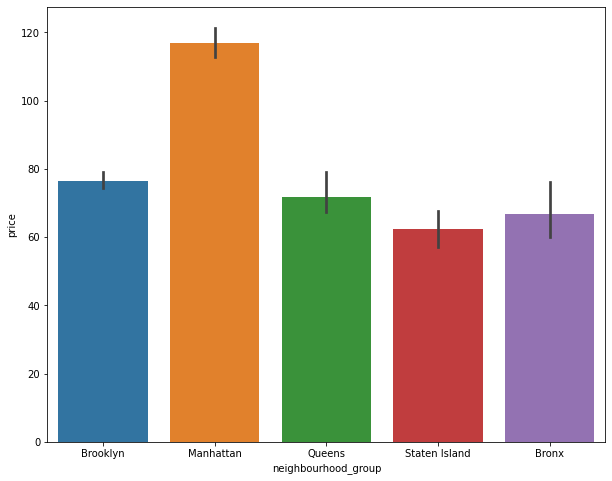

In [17]:
# private room 매물의 자치구별 평균 가격
plt.figure(figsize=(10,8))
sns.barplot(data=private_room, x='neighbourhood_group', y='price')

* Manhattan을 제외한 나머지 자치구의 평균 금액은 크게 차이나지 않음 (62.3 ~ 76.5)
* Private room의 수가 가장 많은 자치구는 Brooklyn
    * └ Brooklyn에서의 1, 2인실 숙소의 수요가 많을 것으로 예상
* Staten Island는 뉴욕의 외곽 지역으로 인구가 가장 적음. 뉴욕의 중심지인 Manhatten으로의 교통편도 불편한 편.
* Bronx는 Manhattan으로의 교통이 좋고 집값이 싼 곳이나 뉴욕시 중 가장 치안이 나쁘고 학군이 좋지 않음.

따라서 1순위를 Brooklyn, 2순위를 Queens로 선택하여 추천할 세부 지역을 확인할 것임

### 3.2. Brooklyn 세부 지역 선정

#### 3.2.1. Brooklyn 지역 특징

* 뉴욕시 중 인구가 가장 많은 자치구 (2,559,903명, 2019년)
* 유명 고등학교(Brooklyn Technical High School 등)와 대학교(브루클린 칼리지, 프랫 인스티튜트)가 있음
* 맨해튼교, 브루클린대교, 덤보, 프로스펙트파크 등의 관광지 有

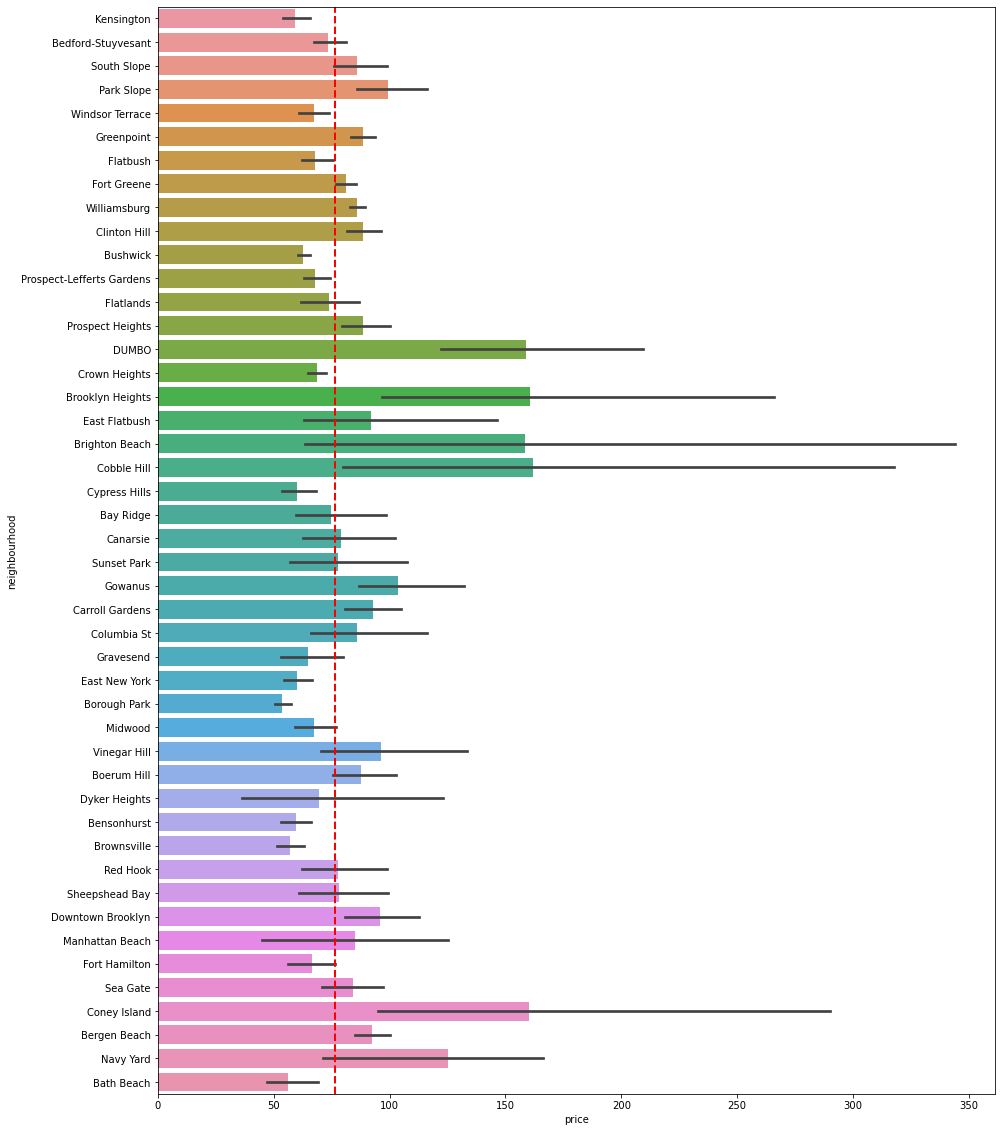

In [18]:
# 브루클린의 private room 데이터만 별도로 저장
brooklyn = private_room[private_room.neighbourhood_group=='Brooklyn']

# 브루클린의 지역별 가격
plt.figure(figsize=(15,20))
sns.barplot(data=brooklyn, y='neighbourhood', x='price')
# axvline으로 세로로 평균선을 그어줌
plt.axvline(x=brooklyn.price.mean(), color='r', linewidth=2, linestyle='--')

* DUMBO, Brooklyn Heights, Righton Beach, Cobble Hill, Coney Island 등을 제외하면 평균 가격(76.5 달러)으로 형성되어 있음

In [19]:
# 경도의 중앙지점을 longitude 변수에 저장
longitude = (brooklyn.longitude.min() + brooklyn.longitude.max()) / 2

# 브루클린 동부의 치안은 좋지 않기 때문에 경도의 중앙지점 기준으로 서쪽 데이터만 추출
brooklyn_west = brooklyn[brooklyn.longitude <= longitude]

In [20]:
# 지역별 가격의 평균을 계산한 피벗테이블. 가격을 기준으로 오름차순 정렬
pd.pivot_table(brooklyn_west, index='neighbourhood', values='price').sort_values('price')

,price
neighbourhood,
Borough Park,53.553191
Bath Beach,56.300000
East Flatbush,59.250000
Kensington,59.377551
Bensonhurst,59.534884
Gravesend,64.928571
Fort Hamilton,66.434783
Windsor Terrace,67.380952
Midwood,67.740000


#### 3.2.2. 리뷰 수 기준 선정

In [21]:
# 총 리뷰수 컬럼에 대한 요약
brooklyn_west.describe().number_of_reviews

count    5091.000000
mean       22.790218
std        44.704210
min         0.000000
25%         1.000000
50%         5.000000
75%        22.000000
max       426.000000
Name: number_of_reviews, dtype: float64

(array([4.284e+03, 4.170e+02, 1.680e+02, 1.000e+02, 6.400e+01, 3.600e+01,
        1.100e+01, 2.000e+00, 7.000e+00, 2.000e+00]),
 array([  0. ,  42.6,  85.2, 127.8, 170.4, 213. , 255.6, 298.2, 340.8,
        383.4, 426. ]),
 <BarContainer object of 10 artists>)

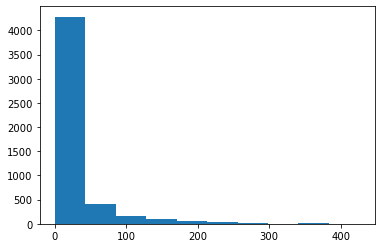

In [22]:
# 총 리뷰수의 히스토그램
plt.hist(brooklyn_west.number_of_reviews)

<AxesSubplot:xlabel='number_of_reviews', ylabel='Count'>

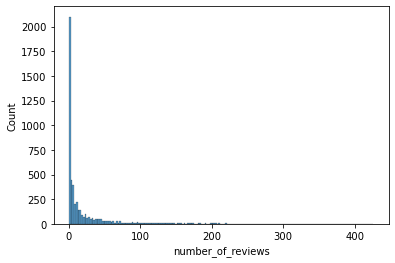

In [23]:
sns.histplot(data=brooklyn_west, x='number_of_reviews')

* 총 리뷰수가 많을수록 인기 많은 숙소라고 가정
* 히스토그램을 참고했을 때 40개 이상으로 기준 선정

#### 3.2.3. '1년 중 대여가능 일수' 기준 선정

In [24]:
# 대여가능일수의 요약
brooklyn_west.describe().availability_365

count    5091.000000
mean       95.245924
std       127.173526
min         0.000000
25%         0.000000
50%        16.000000
75%       178.000000
max       365.000000
Name: availability_365, dtype: float64

(array([2769.,  382.,  353.,  128.,  249.,  116.,  147.,  173.,  253.,
         521.]),
 array([  0. ,  36.5,  73. , 109.5, 146. , 182.5, 219. , 255.5, 292. ,
        328.5, 365. ]),
 <BarContainer object of 10 artists>)

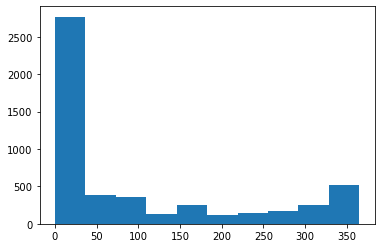

In [25]:
# 대여가능일수의 히스토그램
plt.hist(brooklyn_west.availability_365)

* '1년 중 대여가능 일수'가 적을수록 인기 많은 숙소라고 가정
* 평균값과 히스토그램을 참고했을 때 80일 이하로 기준 선정

#### 3.2.4. Brooklyn 최종 지역 선정

In [26]:
# price: 브루클린 전체 평균 이하
# number_of_reviews: 40개 이상
# availability_365: 80일 이하
brooklyn_popular = brooklyn_west[(brooklyn_west.price <= brooklyn.price.mean()) &
                                 (brooklyn_west.number_of_reviews >= 40) &
                                 (brooklyn_west.availability_365 <= 80)]
brooklyn_popular

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
30031,NYC artists’ loft with roof deck,129352,Sol,Brooklyn,Greenpoint,40.73494,-73.95030,Private room,50,3,193,2019-05-20,1.86,1,0
39282,Indie-Chic Share In Williamsburg,168525,Gus,Brooklyn,Williamsburg,40.71088,-73.95055,Private room,69,4,202,2019-05-28,1.86,2,53
45556,"Fort Greene, Brooklyn: Center Bedroom",67778,Doug,Brooklyn,Fort Greene,40.68863,-73.97691,Private room,65,2,206,2019-06-30,1.92,2,0
55959,Spacious Williamsburg Share w/ LOFT BED,168525,Gus,Brooklyn,Williamsburg,40.70979,-73.95162,Private room,69,4,82,2019-06-10,1.13,2,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29075705,Convenient room in Williamsburg,58658843,Maxim,Brooklyn,Williamsburg,40.70987,-73.95818,Private room,66,1,45,2019-06-23,4.91,3,75
29129018,"AFFORDABLE ROOM, 5 MINUTES TO MANHATTAN!",217784241,Analia,Brooklyn,Williamsburg,40.70964,-73.95969,Private room,60,1,81,2019-06-21,8.97,4,0
29833375,Brooklyn Loft Bedroom II,30346705,Soeun & Rolando,Brooklyn,Bedford-Stuyvesant,40.69086,-73.95955,Private room,50,1,42,2019-07-01,5.38,2,57


In [27]:
# 지역별 브루클린 인기 숙소의 데이터 건수 확인
brooklyn_popular.neighbourhood.value_counts().head()

Williamsburg                 42
Bedford-Stuyvesant           29
Greenpoint                   15
Prospect-Lefferts Gardens    13
Crown Heights                13
Name: neighbourhood, dtype: int64

<AxesSubplot:xlabel='count', ylabel='neighbourhood'>

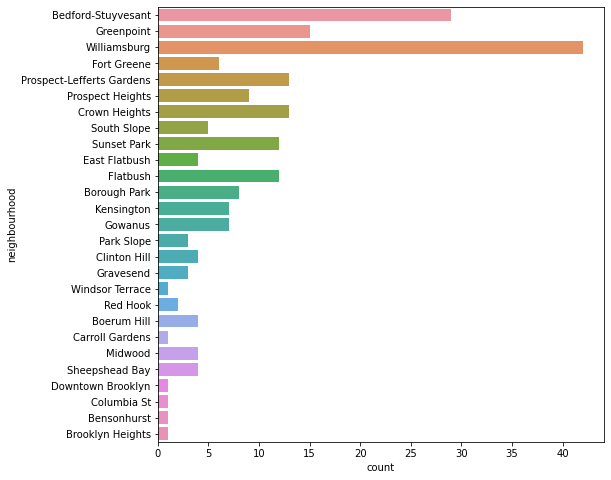

In [28]:
# 지역별 브루클린 인기 숙소의 데이터 건수 시각화
plt.figure(figsize=(8,8))
sns.countplot(data=brooklyn_popular, y='neighbourhood')

In [29]:
# 브루클린 인기 숙소 중 윌리엄스버그의 평균 가격
brooklyn_popular[brooklyn_popular.neighbourhood=='Williamsburg'].price.mean()

64.26190476190476

위의 조건에서 Williamsburg 지역의 숙소가 가장 많기 때문에 대체적으로 인기가 높은 지역이라 판단함

* 추천 지역: Williamsburg, Brooklyn
* 추천 가격대: 64달러 내외
---
+) 베드포드 스튜이버선트의 경우 치안이 좋지 않은 지역이기 때문에 제외

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

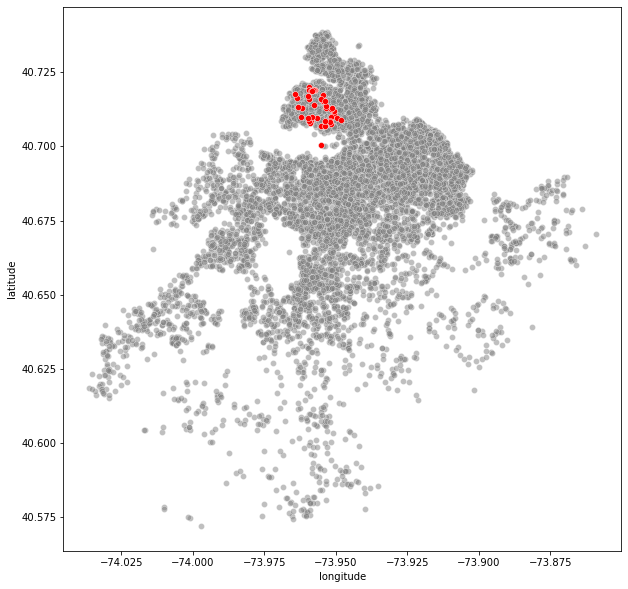

In [30]:
# Williamsburg의 인기 숙소 데이터를 별도로 저장
williamsburg = brooklyn_popular[brooklyn_popular.neighbourhood=='Williamsburg']

# Williamsburg 인기 숙소의 대략적인 위치 시각화
plt.figure(figsize=(10,10))
sns.scatterplot(data=brooklyn, x='longitude', y='latitude', color='gray', alpha=0.5)
sns.scatterplot(data=williamsburg, x='longitude', y='latitude', color='r')

In [56]:
brooklyn

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
5803,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314
8024,CBG CtyBGd HelpsHaiti rm#1:1-4,22486,Lisel,Brooklyn,Park Slope,40.68069,-73.97706,Private room,130,2,130,2019-07-01,1.09,6,347
8025,CBG Helps Haiti Room#2.5,22486,Lisel,Brooklyn,Park Slope,40.67989,-73.97798,Private room,80,1,39,2019-01-01,0.37,6,364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36481615,"Peaceful space in Greenpoint, BK",274298453,Adrien,Brooklyn,Greenpoint,40.72585,-73.94001,Private room,54,6,0,NaN,NaN,1,15
36482231,Bushwick _ Myrtle-Wyckoff,66058896,Luisa,Brooklyn,Bushwick,40.69652,-73.91079,Private room,40,20,0,NaN,NaN,1,31
36482783,Brooklyn Oasis in the heart of Williamsburg,274307600,Jonathan,Brooklyn,Williamsburg,40.71790,-73.96238,Private room,190,7,0,NaN,NaN,1,341


{'whiskers': [<matplotlib.lines.Line2D at 0x1b540110520>,
 'caps': [<matplotlib.lines.Line2D at 0x1b540110be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b5401101c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b54011c2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b54011c640>],
 'means': []}

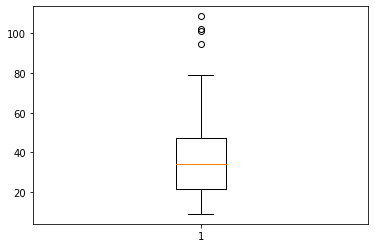

In [31]:
# 총 리뷰 수 / 월 평균 리뷰수 = 운영한 개월 수..?
# 이게 맞는 계산이라면,, 대체적으로 2년 ~ 4년 정도 운영한 숙소가 많음 (전체 데이터와 비교했을 때 조금 더 긴 편)
# 상대적으로 오래된 인기 있는 숙소와 차별적인 서비스를 제공하면 좋지 않을까?
# 신규 숙소라는 메리트도 있을 것

plt.boxplot(williamsburg.number_of_reviews / williamsburg.reviews_per_month)

In [32]:
(williamsburg.number_of_reviews / williamsburg.reviews_per_month).describe()

count     42.000000
mean      39.580939
std       26.477418
min        9.030100
25%       21.642752
50%       34.256640
75%       47.373950
max      108.602151
dtype: float64

In [33]:
# 전체 데이터 운영기간(개월) 요약
(Airbnb.number_of_reviews / Airbnb.reviews_per_month).describe()

count    38843.000000
mean        27.590056
std         22.333991
min          1.000000
25%          9.127387
50%         22.746781
75%         40.865330
max        128.571429
dtype: float64

In [79]:
williamsburg.host_id.value_counts().head()

48100358    3
6032480     2
31304940    2
308875      2
168525      2
Name: host_id, dtype: int64

### 3.3. Queens 세부 지역 선정

#### 3.3.1. Queens 지역 특징

* 뉴욕시에서 두 번째로 인구가 가장 많음 (2,253,858명, 2019년)
* 북쪽에는 라과디아 공항, 남쪽에는 존 F. 케네디 국제공항, 중간에는 자메이카역(롱아일랜드 철도의 주요 분기역)이 있음
* 롱아일랜드 철도를 이용할 시 Manhattan까지 30분 소요
* 아시안이 많은 지역. 특히 플러싱에는 중국계 이민자와 화교, 그리고 한국계 재미교포 등이 대다수 거주

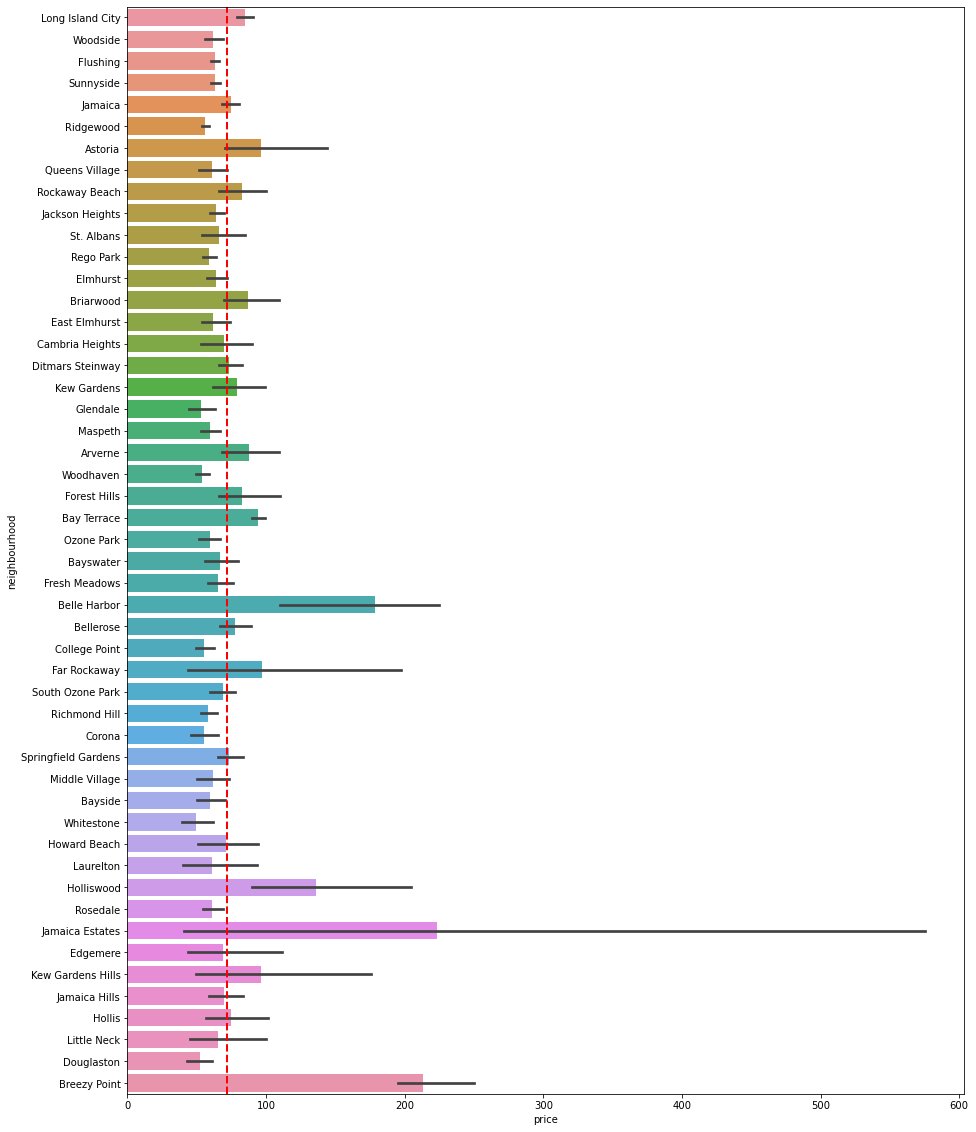

In [36]:
# Queens의 private room 데이터만 별도로 저장
queens = private_room[private_room.neighbourhood_group=='Queens']

# Queens의 지역별 가격
plt.figure(figsize=(15,20))
sns.barplot(data=queens, y='neighbourhood', x='price')
plt.axvline(x=queens.price.mean(), color='r', linewidth=2, linestyle='--')

* Belle Harbor, Jamaica Estates, Breezy Point 등을 제외하면 평균 가격(71.8 달러)으로 형성되어 있음
* +) Queens는 치안에 대한 지역적인 공통점이 없기 때문에 전체 데이터를 활용할 것임

In [37]:
# 지역별 가격의 평균을 계산한 피벗테이블. 가격을 기준으로 오름차순 정렬
pd.pivot_table(queens, index='neighbourhood', values='price').sort_values('price')

,price
neighbourhood,
Whitestone,49.125000
Douglaston,52.000000
Glendale,52.964286
Woodhaven,53.939394
Corona,55.000000
College Point,55.111111
Ridgewood,56.260563
Richmond Hill,58.000000
Rego Park,59.084746


#### 3.3.2. 리뷰 수 기준 선정

In [38]:
queens.describe().number_of_reviews

count    3372.000000
mean       27.746441
std        54.999593
min         0.000000
25%         1.000000
50%         7.000000
75%        30.000000
max       629.000000
Name: number_of_reviews, dtype: float64

(array([2.509e+03, 3.950e+02, 2.000e+02, 1.040e+02, 5.800e+01, 2.400e+01,
        2.000e+01, 1.300e+01, 1.200e+01, 6.000e+00, 5.000e+00, 5.000e+00,
        3.000e+00, 6.000e+00, 5.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00]),
 array([  0,  30,  60,  90, 120, 150, 180, 210, 240, 270, 300, 330, 360,
        390, 420, 450, 480, 510, 540, 570, 600]),
 <BarContainer object of 20 artists>)

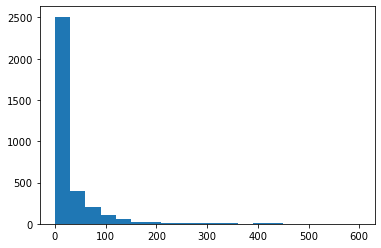

In [39]:
# bins=range(시작, 끝, 간격)으로 히스토그램의 x축 범위를 임의로 지정할 수 있음
plt.hist(queens.number_of_reviews, bins=range(0,630,30))

* 총 리뷰수가 많을수록 인기 많은 숙소라고 가정
* 평균값과 히스토그램을 참고했을 때 30개 이상으로 기준 선정

#### 3.3.3. '1년 중 대여가능 일수' 기준 선정

In [40]:
queens.describe().availability_365

count    3372.000000
mean      149.222716
std       136.683393
min         0.000000
25%         3.000000
50%       108.000000
75%       298.000000
max       365.000000
Name: availability_365, dtype: float64

(array([1097.,  254.,  337.,  150.,  304.,  102.,  141.,  118.,  233.,
         636.]),
 array([  0. ,  36.5,  73. , 109.5, 146. , 182.5, 219. , 255.5, 292. ,
        328.5, 365. ]),
 <BarContainer object of 10 artists>)

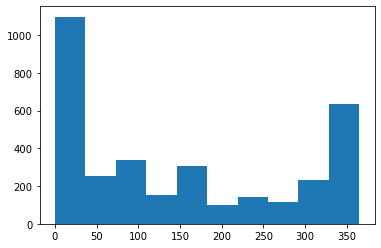

In [41]:
plt.hist(queens.availability_365)

* '1년 중 대여가능 일수'가 적을수록 인기 많은 숙소라고 가정
* 평균값과 히스토그램을 참고했을 때 150일 이하로 기준 선정

#### 3.3.4. Queens 최종 지역 선정

In [42]:
# price: 퀸스 전체 평균 이하
# number_of_reviews: 30개 이상
# availability_365: 150일 이하
queens_popular = queens[(queens.price <= queens.price.mean()) &
                        (queens.number_of_reviews >= 30) &
                        (queens.availability_365 <= 150)]
queens_popular

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
267435,Large Sunny Bedroom in QNS NYC,1402454,Jocelin,Queens,Rego Park,40.73349,-73.86009,Private room,55,1,38,2019-07-01,0.85,1,0
432090,Only 5 Min. to Manhattan!,2148881,Grace,Queens,Long Island City,40.74826,-73.94633,Private room,50,180,69,2016-09-28,0.79,1,0
658932,Cozy room on a tree lined street,3323929,Erika,Queens,Ridgewood,40.69922,-73.90027,Private room,69,1,30,2019-06-22,0.40,1,0
708637,Cozy bedroom near Manhattan & airport,3644693,Eugenia,Queens,Jackson Heights,40.74869,-73.88293,Private room,68,28,55,2019-06-01,0.67,2,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32038185,"8mins to JFK airport, separate door & bathroom",240203470,Modesta,Queens,Jamaica,40.67804,-73.80122,Private room,25,1,44,2019-06-30,9.23,1,41
32043013,2 JFK Layover - Express train to Manhattan-30 ...,67746251,Gasminee,Queens,Ozone Park,40.68237,-73.84874,Private room,45,1,40,2019-07-08,7.79,4,30
32047002,3 JFK Layover - Express train to Manhattan-30 ...,67746251,Gasminee,Queens,Ozone Park,40.68240,-73.84997,Private room,42,1,33,2019-06-24,6.39,4,31


In [43]:
queens_popular.neighbourhood.value_counts().head()

Flushing            51
Astoria             32
Long Island City    22
Ridgewood           20
East Elmhurst       19
Name: neighbourhood, dtype: int64

<AxesSubplot:xlabel='count', ylabel='neighbourhood'>

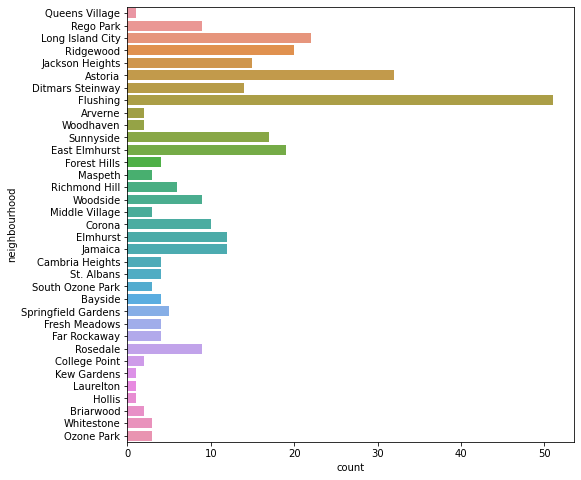

In [44]:
plt.figure(figsize=(8,8))
sns.countplot(data=queens_popular, y='neighbourhood')

In [45]:
# 퀸스 플러싱의 인기 숙소의 평균 가격
queens_popular[queens_popular.neighbourhood=='Flushing'].price.mean()

50.529411764705884

In [46]:
# 퀸스 아스토리아의 인기 숙소의 평균 가격
queens_popular[queens_popular.neighbourhood=='Astoria'].price.mean()

53.03125

위의 조건에서 Flushing과 Astoria 지역의 숙소가 두드러지게 많기 때문에 대체적으로 인기가 높은 지역이라 판단함

* 추천 지역: Flushing, Queens
* 추천 가격대: 51달러 내외
---
* 추천 지역: Astoria, Queens
* 추천 가격대: 53달러 내외

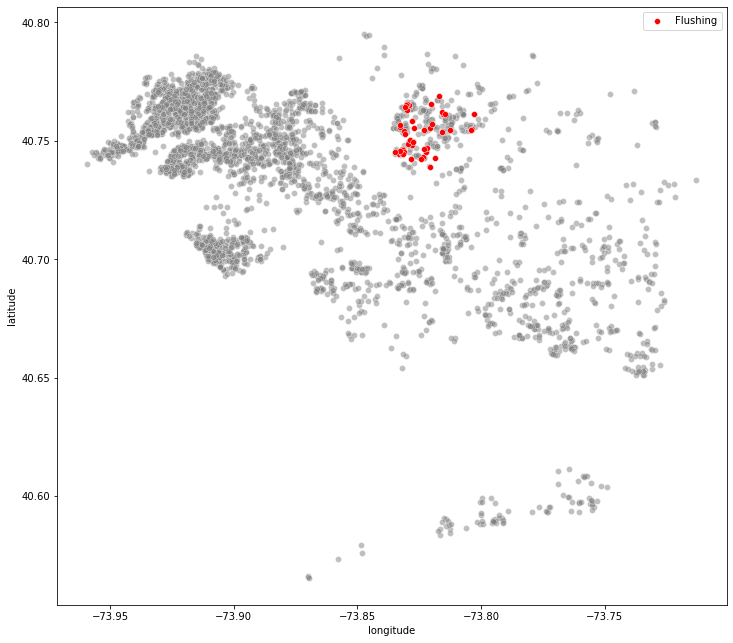

In [65]:
# Flushing의 인기 숙소 데이터를 별도로 저장
flushing = queens_popular[queens_popular.neighbourhood=='Flushing']
# Astoria의 인기 숙소 데이터를 별도로 저장
astoria = queens_popular[queens_popular.neighbourhood=='Astoria']

# Flushing, Astoria 인기 숙소의 대략적인 위치 시각화
plt.figure(figsize=(12, 11))
sns.scatterplot(data=queens, x='longitude', y='latitude', color='gray', alpha=0.5)
sns.scatterplot(data=flushing, x='longitude', y='latitude', color='r', label='Flushing')
#sns.scatterplot(data=astoria, x='longitude', y='latitude', color='b', label='Astoria')
plt.legend() # 범례 출력. 위에서 설정한 label의 이름이 표시됨
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x1b540d093a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b540d09a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b540d09040>],
 'medians': [<matplotlib.lines.Line2D at 0x1b540d15160>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b540d154c0>],
 'means': []}

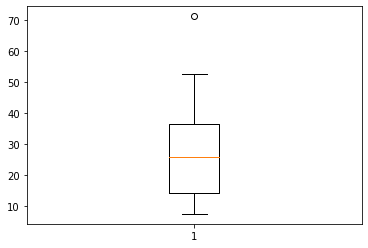

In [48]:
# 플러싱
# 대체적으로 1년 ~ 3년 정도 운영한 숙소가 많음 (전체 평균 수준)
# 브루클린, 아스토리아보다는 기간이 1년 정도 짧음

plt.boxplot(flushing.number_of_reviews / flushing.reviews_per_month)

In [49]:
(flushing.number_of_reviews / flushing.reviews_per_month).describe()

count    51.000000
mean     27.266516
std      14.767776
min       7.366071
25%      14.273052
50%      25.615764
75%      36.538462
max      71.165644
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1b540d6c1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b540d6c8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b540d5de50>],
 'medians': [<matplotlib.lines.Line2D at 0x1b540d6cf70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b540d76340>],
 'means': []}

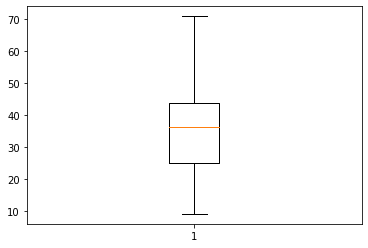

In [50]:
# 아스토리아
# 대체적으로 2년 ~ 4년 정도 운영한 숙소가 많음
# 우왁 여기도 좀 고인물,,

plt.boxplot(astoria.number_of_reviews / astoria.reviews_per_month)

In [51]:
(astoria.number_of_reviews / astoria.reviews_per_month).describe()

count    32.000000
mean     36.176281
std      16.200723
min       9.107807
25%      24.858597
50%      36.103626
75%      43.835993
max      70.833333
dtype: float64

In [52]:
# 전체 데이터 운영기간(개월) 요약
(Airbnb.number_of_reviews / Airbnb.reviews_per_month).describe()

count    38843.000000
mean        27.590056
std         22.333991
min          1.000000
25%          9.127387
50%         22.746781
75%         40.865330
max        128.571429
dtype: float64

In [53]:
flushing.host_id.value_counts().head()

27673980     8
65809485     5
92706260     4
191571338    4
181710793    3
Name: host_id, dtype: int64

In [77]:
astoria.host_id.value_counts().head()

40503875     2
25843005     2
5577926      2
132486597    1
80561485     1
Name: host_id, dtype: int64

**호스트 검색 URL**

https://www.airbnb.co.kr/users/show/5577926


## 4. 결론

1. private room의 데이터 개수가 많은 자치구 + 치안, 관광, 교통, 인구 등의 추가 요소를 고려해서 자치구 2곳 선정
2. 해당 지역의 평균 가격 이하, 리뷰 n개 이상, 1년 중 대여가능 일수 n일 이하로 필터링 → 저렴하고 사람들이 자주 찾는 숙소를 선별
3. 위 데이터에서 건수가 두드러지게 많은 지역을 선별 → 저렴하고 인기 있는 숙소에 대한 수요가 많은 곳이라 판단
4. 필터링한 데이터의 해당 지역 평균 가격으로 추천 가격을 설정함

### 최종순위

**1순위**
* 추천 지역: Flushing, Queens
* 추천 가격대: 51달러(약 63,000원) 내외

---

**2순위**
* 추천 지역: Astoria, Queens
* 추천 가격대: 53달러(약 65,500원)  내외

---

**3순위**
* 추천 지역: Williamsburg, Brooklyn
* 추천 가격대: 64달러(약 79,000원) 내외
